In [2]:
import pandas as pd
import numpy as np
import scipy as scipy
from scipy.interpolate import interp1d
from scipy.optimize import nnls
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


### Functions

In [3]:
#function to calculate temp and salinity corrections from Sullivan et al. 2006

def tempsal_corr(wavel):

    tmp = np.array([
        [400.0000, 0.0001, 0],
        [402.0000, 0.0001, 0],
        [404.0000, 0.0001, 0],
        [406.0000, 0.0001, 0],
        [408.0000, 0, 0.0000],
        [410.0000, 0, 0.0000],
        [412.0000, 0, 0.0000],
        [414.0000, 0.0001, 0.0000],
        [416.0000, 0.0001, 0.0000],
        [418.0000, 0, 0.0000],
        [420.0000, 0, 0.0000],
        [422.0000, 0, 0],
        [424.0000, 0, 0],
        [426.0000, 0, 0],
        [428.0000, 0, 0],
        [430.0000, 0, 0],
        [432.0000, 0, 0],
        [434.0000, 0, 0],
        [436.0000, 0, 0],
        [438.0000, 0, 0],
        [440.0000, 0, 0],
        [442.0000, 0, 0],
        [444.0000, 0, 0],
        [446.0000, 0, 0],
        [448.0000, 0, 0],
        [450.0000, 0, 0],
        [452.0000, 0, 0],
        [454.0000, 0, 0],
        [456.0000, 0, 0],
        [458.0000, 0, 0],
        [460.0000, 0, 0],
        [462.0000, 0, 0],
        [464.0000, 0, 0],
        [466.0000, 0, 0],
        [468.0000, 0, 0],
        [470.0000, 0, 0],
        [472.0000, 0, 0],
        [474.0000, 0, 0],
        [476.0000, 0, 0],
        [478.0000, 0, 0],
        [480.0000, 0, -0.0000],
        [482.0000, 0, -0.0000],
        [484.0000, 0, -0.0000],
        [486.0000, 0, -0.0000],
        [488.0000, 0, -0.0000],
        [490.0000, 0, -0.0000],
        [492.0000, 0, -0.0000],
        [494.0000, 0, -0.0000],
        [496.0000, 0, -0.0000],
        [498.0000, 0, -0.0000],
        [500.0000, 0, -0.0000],
        [502.0000, 0, -0.0000],
        [504.0000, 0, -0.0000],
        [506.0000, 0, -0.0000],
        [508.0000, 0.0001, -0.0000],
        [510.0000, 0.0001, -0.0000],
        [512.0000, 0.0001, -0.0000],
        [514.0000, 0.0001, -0.0000],
        [516.0000, 0.0001, 0],
        [518.0000, 0.0001, 0],
        [520.0000, 0.0001, 0],
        [522.0000, 0.0001, 0],
        [524.0000, 0.0001, 0],
        [526.0000, 0.0001, 0],
        [528.0000, 0, 0],
        [530.0000, 0, 0],
        [532.0000, 0, 0],
        [534.0000, 0, 0],
        [536.0000, 0, 0],
        [538.0000, 0, 0],
        [540.0000, 0, 0],
        [542.0000, 0, -0.0000],
        [544.0000, 0, -0.0000],
        [546.0000, 0, 0],
        [548.0000, 0, 0],
        [550.0000, 0, 0],
        [552.0000, 0, 0],
        [554.0000, 0, 0],
        [556.0000, 0, 0],
        [558.0000, 0, 0],
        [560.0000, 0, -0.0000],
        [562.0000, 0, -0.0000],
        [564.0000, 0, -0.0000],
        [566.0000, 0, -0.0000],
        [568.0000, 0, -0.0000],
        [570.0000, 0, -0.0000],
        [572.0000, 0, -0.0000],
        [574.0000, 0, -0.0000],
        [576.0000, 0.0001, -0.0000],
        [578.0000, 0.0001, -0.0000],
        [580.0000, 0.0002, -0.0000],
        [582.0000, 0.0002, -0.0000],
        [584.0000, 0.0003, -0.0000],
        [586.0000, 0.0004, -0.0000],
        [588.0000, 0.0004, -0.0000],
        [590.0000, 0.0005, -0.0000],
        [592.0000, 0.0006, -0.0000],
        [594.0000, 0.0008, -0.0000],
        [596.0000, 0.0009, -0.0000],
        [598.0000, 0.0010, -0.0000],
        [600.0000, 0.0011, -0.0000],
        [602.0000, 0.0011, 0],
        [604.0000, 0.0011, 0.0000],
        [606.0000, 0.0011, 0.0000],
        [608.0000, 0.0011, 0.0000],
        [610.0000, 0.0010, 0.0000],
        [612.0000, 0.0009, 0.0001],
        [614.0000, 0.0008, 0.0001],
        [616.0000, 0.0007, 0.0001],
        [618.0000, 0.0007, 0.0001],
        [620.0000, 0.0006, 0.0001],
        [622.0000, 0.0005, 0.0001],
        [624.0000, 0.0004, 0.0001],
        [626.0000, 0.0003, 0.0001],
        [628.0000, 0.0002, 0.0001],
        [630.0000, 0.0002, 0.0001],
        [632.0000, 0.0001, 0.0001],
        [634.0000, 0, 0.0001],
        [636.0000, 0, 0.0000],
        [638.0000, 0, 0.0000],
        [640.0000, -0.0001, 0.0000],
        [642.0000, -0.0001, 0.0000],
        [644.0000, -0.0001, 0.0000],
        [646.0000, -0.0001, 0.0000],
        [648.0000, -0.0001, 0.0000],
        [650.0000, 0, 0.0000],
        [652.0000, 0, 0.0000],
        [654.0000, 0.0001, 0.0000],
        [656.0000, 0.0001, 0.0000],
        [658.0000, 0.0002, 0.0000],
        [660.0000, 0.0002, 0.0000],
        [662.0000, 0.0002, 0.0000],
        [664.0000, 0.0002, 0.0000],
        [666.0000, 0.0002, 0.0000],
        [668.0000, 0.0001, 0.0000],
        [670.0000, 0.0001, 0.0000],
        [672.0000, 0, 0.0000],
        [674.0000, 0, 0.0000],
        [676.0000, -0.0001, 0],
        [678.0000, -0.0001, -0.0000],
        [680.0000, -0.0001, -0.0000],
        [682.0000, -0.0002, -0.0000],
        [684.0000, -0.0002, -0.0000],
        [686.0000, -0.0002, -0.0001],
        [688.0000, -0.0001, -0.0001],
        [690.0000, -0.0001, -0.0001],
        [692.0000, -0.0001, -0.0001],
        [694.0000, 0, -0.0001],
        [696.0000, 0.0001, -0.0001],
        [698.0000, 0.0002, -0.0001],
        [700.0000, 0.0004, -0.0002],
        [702.0000, 0.0006, -0.0002],
        [704.0000, 0.0009, -0.0002],
        [706.0000, 0.0012, -0.0002],
        [708.0000, 0.0017, -0.0002],
        [710.0000, 0.0022, -0.0002],
        [712.0000, 0.0027, -0.0002],
        [714.0000, 0.0033, -0.0002],
        [716.0000, 0.0040, -0.0002],
        [718.0000, 0.0049, -0.0002],
        [720.0000, 0.0060, -0.0002],
        [722.0000, 0.0071, -0.0003],
        [724.0000, 0.0084, -0.0003],
        [726.0000, 0.0096, -0.0003],
        [728.0000, 0.0108, -0.0002],
        [730.0000, 0.0120, -0.0002],
        [732.0000, 0.0130, -0.0002],
        [734.0000, 0.0139, -0.0001],
        [736.0000, 0.0146, 0.0000],
        [738.0000, 0.0150, 0.0001],
        [740.0000, 0.0150, 0.0003],
        [742.0000, 0.0147, 0.0004],
        [744.0000, 0.0142, 0.0005],
        [746.0000, 0.0138, 0.0007],
        [748.0000, 0.0131, 0.0008],
        [750.0000, 0.0124, 0.0009]
    ])
    psiT = np.interp(wavel, tmp[:, 0], tmp[:, 1], left=0, right=0)  # Linear interpolation for psiT
    psiS = np.interp(wavel, tmp[:, 0], tmp[:, 2], left=0, right=0)  # Linear interpolation for psiS
    
    return psiT, psiS


In [4]:
#function to calculate 

def RInw(lambda_val, Tc, S):
    # refractive index of air is from Ciddor (1996, Applied Optics)
    n_air = 1.0 + (5792105.0 / (238.0185 - 1. / (lambda_val / 1e3) ** 2) + 167917.0 / (57.362 - 1. / (lambda_val / 1e3) ** 2)) / 1e8

    # refractive index of seawater is from Quan and Fry (1994, Applied Optics)
    n0 = 1.31405
    n1 = 1.779e-4
    n2 = -1.05e-6
    n3 = 1.6e-8
    n4 = -2.02e-6
    n5 = 15.868
    n6 = 0.01155
    n7 = -0.00423
    n8 = -4382
    n9 = 1.1455e6

    nsw = n0 + (n1 + n2 * Tc + n3 * Tc ** 2) * S + n4 * Tc ** 2 + (n5 + n6 * S + n7 * Tc) / lambda_val + n8 / lambda_val ** 2 + n9 / lambda_val ** 3
    # pure seawater

    nsw = nsw * n_air
    dnswds = (n1 + n2 * Tc + n3 * Tc ** 2 + n6 / lambda_val) * n_air

    return nsw, dnswds


In [5]:
#function to calculate isothermal compressibility

def BetaT(Tc, S):
    # pure water secant bulk Millero (1980, Deep-sea Research)
    kw = 19652.21 + 148.4206 * Tc - 2.327105 * Tc ** 2 + 1.360477e-2 * Tc ** 3 - 5.155288e-5 * Tc ** 4
    Btw_cal = 1. / kw

    # seawater secant bulk
    a0 = 54.6746 - 0.603459 * Tc + 1.09987e-2 * Tc ** 2 - 6.167e-5 * Tc ** 3
    b0 = 7.944e-2 + 1.6483e-2 * Tc - 5.3009e-4 * Tc ** 2

    Ks = kw + a0 * S + b0 * S ** 1.5

    # calculate seawater isothermal compressibility from the secant bulk
    IsoComp = 1. / Ks * 1e-5  # unit is pa
    
    return IsoComp

In [6]:
#function to calculate density of seawater

def rhou_sw(Tc, S):
    # density of water and seawater, unit is Kg/m^3, from UNESCO, 38, 1981
    a0 = 8.24493e-1
    a1 = -4.0899e-3
    a2 = 7.6438e-5
    a3 = -8.2467e-7
    a4 = 5.3875e-9
    a5 = -5.72466e-3
    a6 = 1.0227e-4
    a7 = -1.6546e-6
    a8 = 4.8314e-4
    b0 = 999.842594
    b1 = 6.793952e-2
    b2 = -9.09529e-3
    b3 = 1.001685e-4
    b4 = -1.120083e-6
    b5 = 6.536332e-9

    # density for pure water
    density_w = b0 + b1 * Tc + b2 * Tc ** 2 + b3 * Tc ** 3 + b4 * Tc ** 4 + b5 * Tc ** 5
    # density for pure seawater
    density_sw = density_w + ((a0 + a1 * Tc + a2 * Tc ** 2 + a3 * Tc ** 3 + a4 * Tc ** 4) * S + (a5 + a6 * Tc + a7 * Tc ** 2) * S ** 1.5 + a8 * S ** 2)

    return density_sw


In [7]:
#function to calculate water activity data of seawater?
def dlnasw_ds(Tc, S):
    dlnawds = (
        -5.58651e-4 + 2.40452e-7 * Tc - 3.12165e-9 * Tc ** 2 + 2.40808e-11 * Tc ** 3
        + 1.5 * (1.79613e-5 - 9.9422e-8 * Tc + 2.08919e-9 * Tc ** 2 - 1.39872e-11 * Tc ** 3) * S ** 0.5
        + 2 * (-2.31065e-6 - 1.37674e-9 * Tc - 1.93316e-11 * Tc ** 2) * S
    )

    return dlnawds


In [8]:
#function to calculate density derivative of refractive index
def PMH(n_wat):
    n_wat2 = n_wat ** 2
    n_density_derivative = (n_wat2 - 1) * (1 + 2 / 3 * (n_wat2 + 2) * (n_wat / 3 - 1 / (3 * n_wat)) ** 2)
    return n_density_derivative


In [9]:
# Scattering by pure seawater: Effect of salinity
# Xiaodong Zhang, Lianbo Hu, and Ming-Xia He, Optics Express, 2009, accepted
# lambda (nm): wavelength
# Tc: temperauter in degree Celsius, must be a scalar
# S: salinity, must be scalar
# delta: depolarization ratio, if not provided, default = 0.039 will be used.
# betasw: volume scattering at angles defined by theta. Its size is [x y],
# where x is the number of angles (x = length(theta)) and y is the number of wavelengths in lambda (y = length(lambda))
# beta90sw: volume scattering at 90 degree. Its size is [1 y]
# bw: total scattering coefficient. Its size is [1 y]
# for backscattering coefficients, divide total scattering by 2

# Xiaodong Zhang, March 10, 2009

# MODIFIED on 17/05/2011 to be able to process bbp profiles with coincident T and sal profiles
# MODIFIED on 05 Apr 2013 to use 124 degs instead of 117 degs

def betasw124_ZHH2009(lambda_val, S, Tc, delta=0.039):
    # make sure that S and Tc are column vectors
    S = np.array(S).reshape(-1, 1)
    Tc = np.array(Tc).reshape(-1, 1)

    # values of the constants
    Na = 6.0221417930e23  # Avogadro's constant
    Kbz = 1.3806503e-23   # Boltzmann constant
    Tk = Tc + 273.15      # Absolute temperature
    M0 = 18e-3            # Molecular weight of water in kg/mol

    theta = np.arange(0, 180.01, 0.01)

    lambda_val = np.array(lambda_val).reshape(1, -1)  # a row variable
    rad = np.deg2rad(theta).reshape(-1, 1)           # angle in radian as a column variable

    # nsw: absolute refractive index of seawater
    # dnds: partial derivative of seawater refractive index w.r.t. salinity
    nsw, dnds = RInw(lambda_val, Tc, S)

    # isothermal compressibility is from Lepple & Millero (1971,Deep Sea-Research), pages 10-11
    # The error ~ +/-0.004e-6 bar^-1
    IsoComp = BetaT(Tc, S)

    # density of water and seawater, unit is Kg/m^3, from UNESCO, 38, 1981
    density_sw = rhou_sw(Tc, S)

    # water activity data of seawater is from Millero and Leung (1976,American Journal of Science,276,1035-1077).
    # Table 19 was reproduced using Eq.(14,22,23,88,107) then were fitted to polynomial equation.
    # dlnawds is partial derivative of natural logarithm of water activity w.r.t. salinity
    dlnawds = dlnasw_ds(Tc, S)

    # density derivative of refractive index from PMH model
    DFRI = PMH(nsw)  # PMH model

    # volume scattering at 90 degree due to the density fluctuation
    beta_df = np.pi * np.pi / 2 * ((lambda_val * 1e-9) ** (-4)) * Kbz * Tk * IsoComp * DFRI ** 2 * (6 + 6 * delta) / (6 - 7 * delta)

    # volume scattering at 90 degree due to the concentration fluctuation
    flu_con = S * M0 * dnds ** 2 / density_sw / (-dlnawds) / Na
    beta_cf = 2 * np.pi * np.pi * ((lambda_val * 1e-9) ** (-4)) * nsw ** 2 * (flu_con) * (6 + 6 * delta) / (6 - 7 * delta)

    # total volume scattering at 90 degree
    beta90sw = beta_df + beta_cf
    bsw = 8 * np.pi / 3 * beta90sw * (2 + delta) / (1 + delta)

    rad124 = np.argmax(np.rad2deg(rad) >= 124)

    betasw124 = beta90sw * (1 + ((np.cos(rad[rad124])) ** 2) * (1 - delta) / (1 + delta))

    return betasw124, bsw, beta90sw, theta


In [10]:
#function to obtain seawater absorption and backscattering spectra

#pure water absorption from Mason et al 2016 for 250-550, 
#Pope and Frye for 550-730 nm, and Smith and Baker for 730-800 nm
#salt water backscattering from Zhang et al 2009
#corrected for in situ temperature and salinity conditions Sullivan et al. 2006

def get_water_iops(wave, T, S):

    # Pure water absorption from Mason et al. 2016 for 250-550 nm
    wl_water1 = np.array([250, 260, 270, 280, 290, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330,
                          332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372,
                          374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414,
                          416, 418, 420, 422, 424, 426, 428, 430, 432, 434, 436, 438, 440, 442, 444, 446, 448, 450, 452, 454, 456,
                          458, 460, 462, 464, 466, 468, 470, 472, 474, 476, 478, 480, 482, 484, 486, 488, 490, 492, 494, 496, 498,
                          500, 502, 504, 506, 508, 510, 512, 514, 516, 518, 520, 522, 524, 526, 528, 530, 532, 534, 536, 538, 540,
                          542, 544, 546, 548, 550])
    aw1 = np.array([58.7100, 51.5000, 43.5700, 22.3000, 9.3900, 4.6700, 4.3300, 3.5600, 3.1300, 2.7500, 2.3600, 2.0500, 
                    1.8500, 1.7600, 1.6300, 1.4700, 1.3300, 1.2400, 1.1800, 1.1200, 1.0700, 1.0100, 0.9900, 0.9500,
                    0.9100, 0.8500, 0.8200, 0.8100, 0.8200, 0.8400, 0.8900, 0.9400, 0.9700, 0.9800, 0.9900, 1.0600,
                    1.1500, 1.2000, 1.2100, 1.2200, 1.2400, 1.2700, 1.2900, 1.3300, 1.3700, 1.4300, 1.4700, 1.5100,
                    1.5500, 1.6200, 1.7000, 1.7500, 1.8500, 1.9600, 2.0800, 2.2200, 2.3700, 2.4800, 2.5700, 2.5900,
                    2.6600, 2.7100, 2.8000, 2.8800, 3.0000, 3.1200, 3.2200, 3.3100, 3.4400, 3.5800, 3.7600, 3.9500,
                    4.1700, 4.4200, 4.8000, 5.2200, 5.7400, 6.2600, 6.9100, 7.5100, 8.0800, 8.4200, 8.6300, 8.7700,
                    8.9300, 9.0900, 9.3300, 9.5500, 9.7900, 9.9900, 10.3000, 10.6500, 11.0000, 11.3800, 11.7700, 12.1400,
                    12.5400, 12.9400, 13.3600, 13.9100, 14.6000, 15.4500, 16.4800, 17.7400, 19.2600, 20.7300, 22.4200, 24.2400,
                    26.6800, 29.7100, 33.0000, 35.6900, 37.3800, 38.2100, 38.7800, 39.1700, 39.6200, 40.1700, 40.8800, 41.6200,
                    42.4200, 43.3000, 44.3600, 45.4100, 46.4500, 47.5400, 48.8200, 50.4000, 52.2400, 54.2500, 56.2900])

    # Pure water absorption from Pope and Frye for 550-730 nm
    wl_water2 = np.array([552.5, 555, 557.5, 560, 562.5, 565, 567.5, 570, 572.5, 575, 577.5, 580, 582.5, 585, 587.5, 590, 592.5, 595, 597.5,
                          600, 602.5, 605, 607.5, 610, 612.5, 615, 617.5, 620, 622.5, 625, 627.5, 630, 632.5, 635, 637.5, 640, 642.5,
                          645, 647.5, 650, 652.5, 655, 657.5, 660, 662.5, 665, 667.5, 670, 672.5, 675, 677.5, 680, 682.5, 685, 687.5,
                          690, 692.5, 695, 697.5, 700, 702.5, 705, 707.5, 710, 712.5, 715, 717.5, 720, 722.5, 725, 727.5, 730, 732.5,
                          735.0, 737.5, 740.0, 742.5, 745.0, 747.5, 750.0, 752.5, 755.0, 757.5, 760.0, 762.5, 765.0, 767.5, 770.0, 772.5,
                          775.0, 777.5, 780.0, 782.5, 785.0, 787.5, 790.0, 792.5, 795.0, 797.5, 800.0])
    aw2 = np.array([0.0593, 0.0596, 0.0606, 0.0619, 0.064, 0.0642, 0.0672, 0.0695, 0.0733, 0.0772, 0.0836, 0.0896, 0.0989, 
                    0.11, 0.122, 0.1351, 0.1516, 0.1672, 0.1925, 0.2224, 0.247, 0.2577, 0.2629, 0.2644, 0.2665, 0.2678, 
                    0.2707, 0.2755, 0.281, 0.2834, 0.2904, 0.2916, 0.2995, 0.3012, 0.3077, 0.3108, 0.322, 0.325, 0.335,
                    0.34, 0.358, 0.371, 0.393, 0.41, 0.424, 0.429, 0.436, 0.439, 0.448, 0.448, 0.461, 0.465, 0.478, 0.486, 0.502, 0.516, 0.538, 0.559,
                    0.592, 0.624, 0.663, 0.704, 0.756, 0.827, 0.914, 1.007, 1.119, 1.231, 1.356, 1.489, 1.678, 1.7845, 1.9333, 2.0822, 2.2311, 2.3800,
                    2.4025, 2.4250, 2.4475, 2.4700, 2.4900, 2.5100, 2.5300, 2.5500, 2.5400, 2.5300, 2.5200, 2.5100, 2.4725, 2.4350, 2.3975, 2.3600,
                    2.3100, 2.2600, 2.2100, 2.1600, 2.1375, 2.1150, 2.0925, 2.0700])

    # Combine wavelengths and absorption data
    wl_water = np.concatenate((wl_water1, wl_water2))
    a_water = np.concatenate((aw1 * 1e-3, aw2)) # 1e-3 comes from Mason et al. 2016, Table 2

    # Interpolate the pure water absorption to obtain a_pw at the input wavelengths
    a_pw_func = interp1d(wl_water, a_water, kind='linear', bounds_error=False, fill_value='extrapolate')
    a_pw = a_pw_func(wave)

    # Temperature and salinity correction for water absorption (need to know at what T was measured):
    if S == 0 or np.isnan(S):
        S = 35
    if T == 0 or np.isnan(T):
        T = 22
    T_pope=22.0

    #use salt water scattering from Zhang et al 2009
    betasw124, bb_sw, beta90sw, theta = betasw124_ZHH2009(wave, S, T)
    
    #use temp and salinity corrections from Sullivan et al. 2006
    psiT,psiS = tempsal_corr(wave)

    #temp and salinity corrections:
    a_sw = a_pw+psiT*(T-T_pope)+psiS*S

    return a_sw, bb_sw[0]


In [11]:
#function to apply non-linear least squares solver to minimuze the difference between the measured and modeled Rrs
def lsqnonlin_Amp_gen(Amp0, Upos, Uunc, wvns, bb_sw_r, a_sw_r, lnot):
    peak_locs = Amp0[20:32]
    sig = Amp0[32:44]

    # define cdom and nap functions; both slope and magnitude are allowed to vary
    cdom = np.exp(-Amp0[2] * (wvns - lnot))
    CDOM = Amp0[3] * cdom

    nap = np.exp(-Amp0[0] * (wvns - lnot))
    NAP = Amp0[1] * nap

    # define Gaussian shapes
    gaus = np.zeros((len(wvns), len(peak_locs)))
    for ii in range(len(peak_locs)):
        for jj in range(len(wvns)):
            gaus[jj, ii] = np.exp(-0.5 * ((wvns[jj] - peak_locs[ii]) / sig[ii]) ** 2)

    # multiply each Gaussian by the initial guess amplitude
    GAUS = np.zeros_like(gaus)
    for i in range(len(peak_locs)):
        GAUS[:, i] = Amp0[i + 8] * gaus[:, i]

    # Sum all of the Gaussians to get a_phi
    APHI = np.sum(GAUS, axis=1)

    # define cp (slope and magnitude can vary)
    cp = ((wvns / lnot) ** -Amp0[5])
    CP = Amp0[6] * cp

    # total particulate absorption
    AP = NAP + APHI

    # define bbp in terms of the bbp:bp ratio, ap, and cp following Roesler & Boss, 2003
    BBP = Amp0[4] * (CP - AP)

    # Define the fluorescence Gaussian; 685 peak for Chl fluor; 10.6 sigma
    fluor = np.exp(-0.5 * ((wvns - 685) / 10.6) ** 2)
    F = Amp0[7] * fluor

    # modeled U spectrum (U = bb/{a+bb})
    denom = APHI + NAP + CDOM + a_sw_r + BBP + bb_sw_r
    numer = BBP + bb_sw_r + F
    Unew = numer / denom

    # normalize by uncertainties during the minimization
    spec_min = (Upos - Unew) / Uunc

    return spec_min #[0]


### Input data

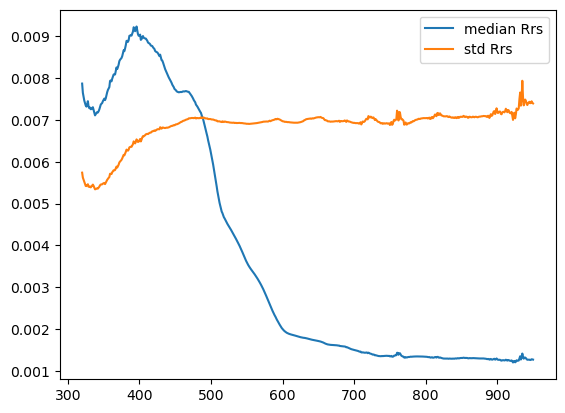

In [12]:
dat = pd.read_csv('/Users/awindled/Documents/Shearwater_Cruise/trios_data/20210827_transect3_mean_std.csv', index_col=0)
#print(dat)

Rrs = dat['Offshore mean']
Rrs_unc = dat['Offshore std']
wl = dat.index.values
tem = 27.6949
sal = 35.6639

plt.plot(wl, Rrs, label='median Rrs')
plt.plot(wl, Rrs_unc, label='std Rrs')
plt.legend()

(400.0, 700.0)

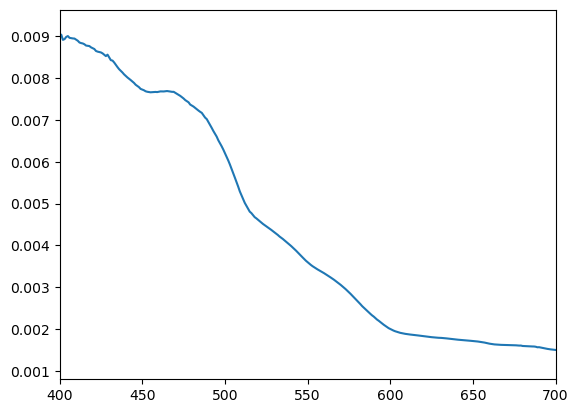

In [13]:
plt.plot(wl, Rrs, label='median Rrs')
plt.xlim(left=400, right=700)

### Main script

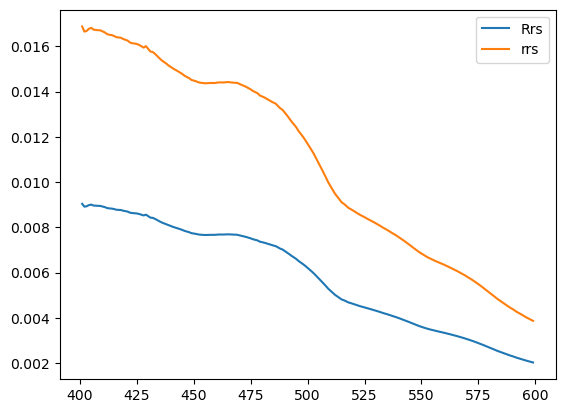

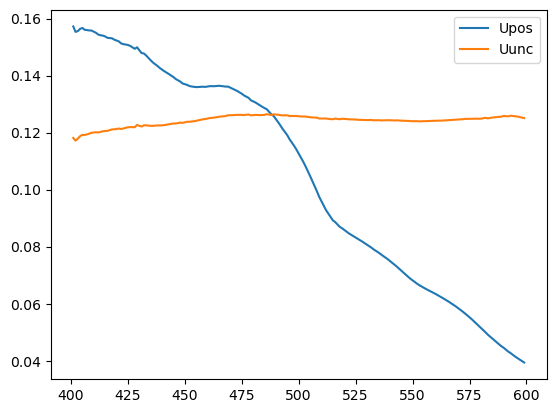

In [14]:
# Constants
g1 = 0.0949 #g1 and g2 are values from Gordon et al., 1988
g2 = 0.0794
lnot = 400  # reference lambda wavelength (nm)

# The data are cut off at 600 nm to reduce the influence of red wavelengths,
# which have low signal to noise, on the inversion
wlfull = wl
Iwl = np.where((wlfull > 400) & (wlfull < 600))
wl = wlfull[Iwl]
Rrs = Rrs.iloc[Iwl]
Rrs_unc = Rrs_unc.iloc[Iwl]

plt.plot(wl, Rrs, label='Rrs')

# Calculate rrs from Rrs (method from Lee et al., 2002)
rrs = Rrs / (0.52 + 1.7 * Rrs)
rrs_unc = Rrs_unc / (0.52 + 1.7 * Rrs_unc)
plt.plot(wl, rrs, label='rrs')
plt.legend()

# Get the absorption and backscattering by water for the temperature and salinity
a_sw, bb_sw = get_water_iops(wl, tem, sal)

# Calculate the positive solution for U using rrs, where U = bb / (bb + a)
# This model and g coefficients are from Gordon et al., 1988 (quadratic formula) 
Upos = np.zeros(len(wl))
Uunc = np.zeros(len(wl))
for i in range(len(wl)):
    Upos[i] = (-g1 + np.sqrt(g1 ** 2 + 4 * g2 * rrs.iloc[i])) / (2 * g2) 
    Uunc[i] = (-g1 + np.sqrt(g1 ** 2 + 4 * g2 * rrs_unc.iloc[i])) / (2 * g2)
plt.figure(2)
plt.plot(wl, Upos, label='Upos')
plt.plot(wl, Uunc, label='Uunc')
plt.legend()
'''
#the U spectra must rows, not columns to pass to the inversion; check for this
sz = np.shape(Uunc)
print(sz)

if sz[0] > sz[1]:
    Upos = Upos.T

sz2 = np.shape(Uunc)
if sz2[0] > sz2[1]:
    Uunc = Uunc.T
'''

# Define the center peak locations (nm) and widths (nm) of the Gaussian functions
# sig = sigma, where FWHM = sigma*2.355 and FWHM = full width at half max
peaks = np.array([384, 413, 435, 461, 464, 490, 532, 583, 623, 644, 655, 676])
sig = np.array([23, 9, 14, 11, 19, 19, 20, 20, 15, 12, 12, 9])

# Define the [lower bound, first guess, upper bound] for each parameter. These will be allowed to vary.
s_nap = np.array([0.005, 0.011, 0.016])  # slope of non-algal particle absorption (nm^-1)
m_nap = np.array([0.0, 0.005, 0.05])    # magnitude of non-algal particle absorption (m^-1)
s_cdom = np.array([0.005, 0.0185, 0.02])  # slope of CDOM absorption (0.0185 first guess from Matsuoka et al., 2013) (nm^-1)
m_cdom = np.array([0.01, 0.1, 0.8])  # magnitude of CDOM absorption (m^-1)
bbpbp_ratio = np.array([0.005, 0.01, 0.015])  # ratio of particulate backscattering to total particulate scattering
m_gaus = np.array([0.0, 0.01, 0.5])  # magnitude of Gaussian functions representing pigment absorption (m^-1)
cpgam = np.array([0.0, 1, 1.3])  # slope of gamma (cp)
m_cp = np.array([0.01, 0.1, 1])  # magnitude of cp spectrum

C_fluor = np.array([0.0, 0.001, 0.01]) #magnitude of Gaussian representing fluorescence 

# First guess array
Amp0 = np.array([s_nap[1], m_nap[1], s_cdom[1], m_cdom[1], bbpbp_ratio[1], cpgam[1], m_cp[1], C_fluor[1]])
Amp0 = np.append([Amp0], [[np.tile(m_gaus[1], len(peaks))], [peaks], [sig]])
                
# Lower bound array
LB = np.array([s_nap[0], m_nap[0], s_cdom[0], m_cdom[0], bbpbp_ratio[0], cpgam[0], m_cp[0], C_fluor[0]])
LB = np.append([LB], [[np.tile(m_gaus[0], len(peaks))], [peaks - 1], [sig - 1]])

# Upper bound array
UB = np.array([s_nap[2], m_nap[2], s_cdom[2], m_cdom[2], bbpbp_ratio[2], cpgam[2], m_cp[2], C_fluor[2]])
UB = np.append([UB], [[np.tile(m_gaus[2], len(peaks))], [peaks + 1], [sig + 1]])

In [15]:
np.set_printoptions(suppress=True)
Amp0

array([  0.011 ,   0.005 ,   0.0185,   0.1   ,   0.01  ,   1.    ,
         0.1   ,   0.001 ,   0.01  ,   0.01  ,   0.01  ,   0.01  ,
         0.01  ,   0.01  ,   0.01  ,   0.01  ,   0.01  ,   0.01  ,
         0.01  ,   0.01  , 384.    , 413.    , 435.    , 461.    ,
       464.    , 490.    , 532.    , 583.    , 623.    , 644.    ,
       655.    , 676.    ,  23.    ,   9.    ,  14.    ,  11.    ,
        19.    ,  19.    ,  20.    ,  20.    ,  15.    ,  12.    ,
        12.    ,   9.    ])

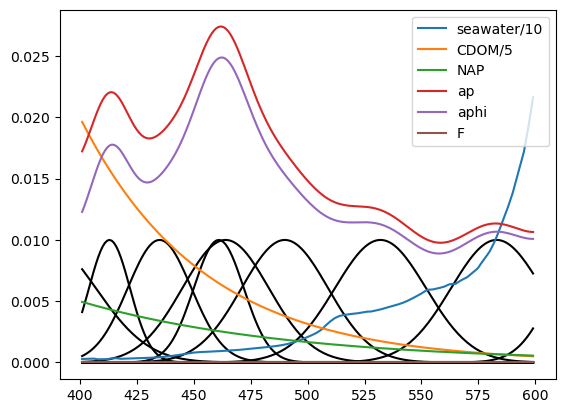

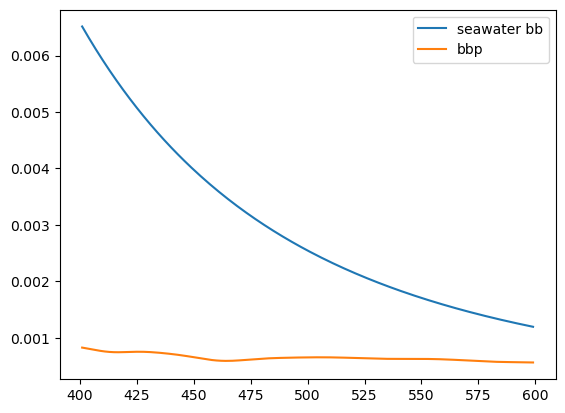

In [17]:
# build spectral components with initial guesses (Amp0) and plot
cdom = np.exp(-Amp0[2] * (wl - lnot))
nap = np.exp(-Amp0[0] * (wl - lnot))
cp = (wl / lnot) ** -Amp0[5]

CDOM = Amp0[3] * cdom
NAP = Amp0[1] * nap
CP = Amp0[6] * cp

peak_locs = Amp0[20:32]
sigs = Amp0[32:44]

# Define Gaussian shapes
gaus = np.zeros((len(wl), len(peak_locs)))
for ii in range(len(peak_locs)):
    for jj in range(len(wl)):
        gaus[jj, ii] = np.exp(-0.5 * ((wl[jj] - peak_locs[ii]) / sigs[ii]) ** 2)
        

# Multiply each Gaussian by initial guess amplitude 
GAUS = np.zeros_like(gaus)
for i in range(len(peak_locs)):
    GAUS[:, i] = Amp0[i + 8] * gaus[:, i]
    plt.plot(wl, GAUS[:,i], color='black')
    
# Sum all of the Gaussians to get a_phi
#APHI = np.sum(GAUS, axis=1)
APHI = np.zeros(len(wl))
for j in range(len(wl)):
    for i in range(len(peak_locs)):
        APHI[j] += np.sum(GAUS[j, i])

# Particulate absorption
AP = NAP + APHI

# Particulate backscattering
BBP = Amp0[4] * (CP - AP)

# Define the fluorescence Gaussian; 685 peak for Chl fluor; 10.6 sigma
fluor=np.zeros_like(wl)
for i in range(len(wl)):
    fluor[i] = np.exp(-0.5 * ((wl[i] - 685) / 10.6) ** 2)
F = Amp0[7] * fluor

#plotting
plt.plot(wl, a_sw/10, label = 'seawater/10')
plt.plot(wl, CDOM/5, label='CDOM/5')
plt.plot(wl, NAP, label='NAP')
#plt.plot(wl, CP, label='cp')
plt.plot(wl, AP, label='ap')
plt.plot(wl, APHI, label='aphi')
plt.plot(wl, F, label='F')
plt.legend()

plt.figure(2)
plt.plot(wl, bb_sw, label='seawater bb')
plt.plot(wl, BBP, label='bbp')
plt.legend()

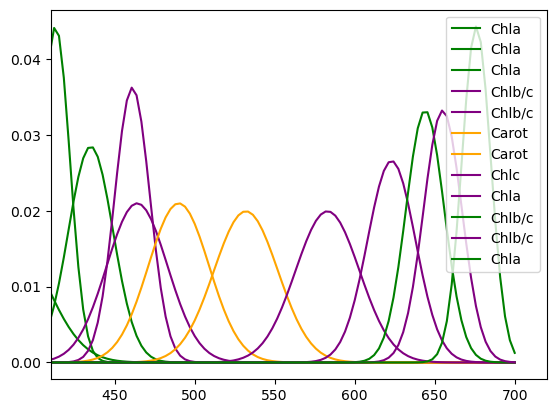

In [18]:
#just testing how to plot gaussians
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

labels = ['Chla', 'Chla', 'Chla', 'Chlb/c', 'Chlb/c', 'Carot', 'Carot', 'Chlc', 'Chla', 'Chlb/c', 'Chlb/c', 'Chla', 'Chla']
colors = ['green', 'green', 'green', 'purple', 'purple', 'orange', 'orange', 'purple', 'purple', 'green', 'purple', 'green', 'green']

for i in range(len(peaks)):
    plt.plot(np.linspace(400, 700, 100), gaussian(np.linspace(400, 700, 100), peaks[i], sig[i]), label=labels[i], color=colors[i])
    plt.xlim(left=410, right=720)
    plt.legend()


In [33]:
# Run the inversion using a non-linear least squares inversion function
result = least_squares(lsqnonlin_Amp_gen, Amp0, bounds=(LB, UB), args=(Upos, Uunc, wl, bb_sw, a_sw, lnot), 
                    ftol=1e-6, xtol=1e-6, gtol=1e-6, tr_solver='lsmr', max_nfev=400) #x_scale='jac' loss='soft_l1') , jac='3-point'

Amp2 = result.x
Amp2

array([  0.00953371,  -0.01341736,   0.00481179,   0.08700004,
         0.07035589,   0.99949144,   0.12183697,   0.001     ,
         0.00829347,   0.00092604,   0.00543277,   0.00186182,
         0.00122566,   0.0023255 ,   0.00815504,   0.00573861,
        -0.02096193,   0.00995509,   0.00999918,   0.01      ,
       384.00000121, 413.00002587, 435.00022184, 460.99974078,
       463.99997459, 489.99986719, 532.00066302, 582.99988996,
       622.99998928, 644.00000015, 655.        , 676.        ,
        23.00000882,   8.99992339,  14.00013634,  10.99991335,
        19.00006595,  18.99948139,  20.00023626,  20.00012933,
        15.00001709,  11.99999942,  11.99999998,   9.        ])

In [23]:
result

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 2.163e-02  3.685e-03 ...  5.061e-02  5.655e-02]
           x: [ 8.173e-03  1.938e-02 ...  1.200e+01  9.000e+00]
        cost: 0.023566814020266027
         jac: [[-2.673e-01  1.379e+01 ...  0.000e+00  0.000e+00]
               [-5.388e-01  1.390e+01 ...  0.000e+00  0.000e+00]
               ...
               [-1.060e+00  2.762e-01 ...  3.231e-07  0.000e+00]
               [-9.907e-01  2.569e-01 ...  4.324e-07  0.000e+00]]
        grad: [ 3.486e+00  8.655e-01 ...  7.038e-08  0.000e+00]
  optimality: 1.4771235921094594
 active_mask: [0 0 ... 0 0]
        nfev: 7
        njev: 7

In [80]:
pd.set_option('display.max_columns', None) 
pd.DataFrame(Amp2).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.008173,0.019378,0.015499,0.058582,0.013133,0.30363,0.717193,0.001,0.0039,0.004399,0.019645,0.008424,0.011641,0.02801,0.050015,0.060173,0.000283,0.00305,0.009783,0.01,383.470963,413.88666,435.95505,460.17256,463.383624,490.817381,532.998191,582.017608,623.274003,644.002631,655.000087,676.0,22.410216,8.205984,14.997797,11.451064,19.53685,19.038025,20.754589,20.911146,14.516269,11.989589,11.999577,9.0


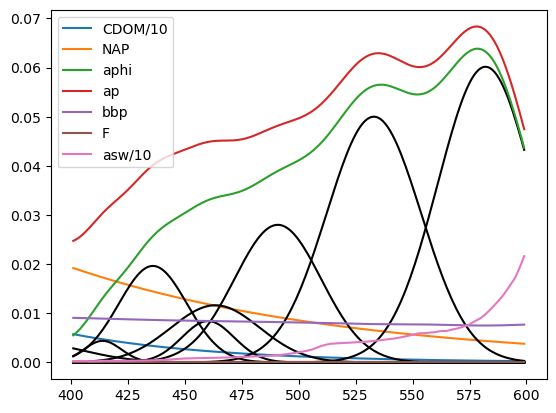

In [24]:
# rebuild spectral components with the results of the inversion (Amp2)
cdom = np.exp(-Amp2[2] * (wl - lnot))
nap = np.exp(-Amp2[0] * (wl - lnot))
cp = (wl / lnot) ** -Amp2[5]

CDOM = Amp2[3] * cdom
NAP = Amp2[1] * nap
CP = Amp2[6] * cp

plt.plot(wl, CDOM/10, label='CDOM/10')
plt.plot(wl, NAP, label='NAP')
#plt.plot(wl, CP, label='cp')

peak_locs = Amp2[20:32]
sigs = Amp2[32:44]

# Define Gaussian shapes
gaus = np.zeros((len(wl), len(peak_locs)))
for ii in range(len(peak_locs)):
    for jj in range(len(wl)):
        gaus[jj, ii] = np.exp(-0.5 * ((wl[jj] - peak_locs[ii]) / sigs[ii]) ** 2)
    #print(gaus[:,ii])

# Multiply each Gaussian by initial guess amplitude 
GAUS = np.zeros((len(wl), len(peak_locs)))
for i in range(len(peak_locs)):
    GAUS[:, i] = Amp2[i + 8] * gaus[:, i]
    plt.plot(wl, GAUS[:,i], color='black')
    
# Sum all of the Gaussians to get a_phi
#APHI = np.sum(GAUS, axis=1)
#APHI = np.zeros(len(wl))
for j in range(len(wl)):
    APHI[j]=0
    for i in range(len(peak_locs)):
        APHI[j] = APHI[j] + np.sum(GAUS[j, i])
    
plt.plot(wl, APHI, label='aphi')

# Particulate absorption
AP = NAP + APHI
plt.plot(wl, AP, label='ap')

# Particulate backscattering
BBP = Amp2[4] * (CP - AP)
plt.plot(wl, BBP, label='bbp')

# Define the fluorescence Gaussian; 685 peak for Chl fluor; 10.6 sigma
fluor=np.zeros_like(wl)
for i in range(len(wl)):
    fluor[i] = np.exp(-0.5 * ((wl[i] - 685) / 10.6) ** 2)
F = Amp2[7] * fluor

plt.plot(wl, F*1000, label='F')

plt.plot(wl, a_sw/10, label ='asw/10')
plt.legend()

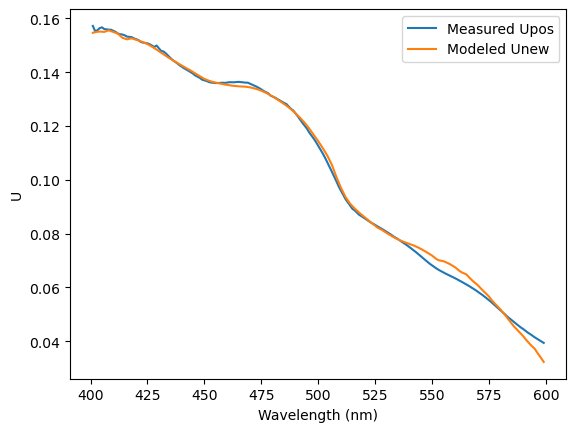

In [25]:
denom = AP + CDOM + a_sw + BBP + bb_sw
numer = BBP + bb_sw + F
Unew = numer / denom
rrs_recon = g1 * Unew + g2 * (Unew ** 2)

plt.figure(2)
plt.plot(wl, Upos, label='Measured Upos')
plt.plot(wl, Unew, label='Modeled Unew')
plt.xlabel('Wavelength (nm)')
plt.ylabel('U')
plt.legend()
plt.show()

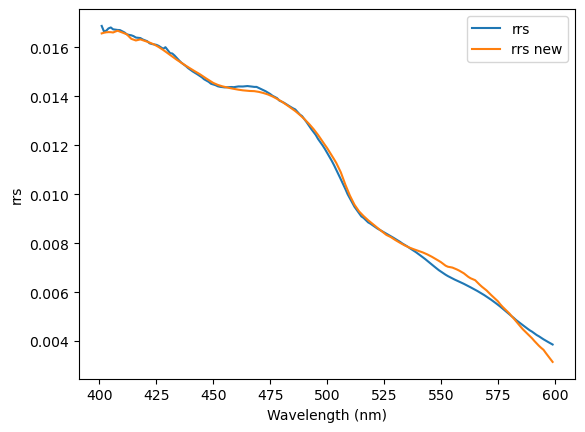

In [26]:
plt.plot(wl, rrs, label='rrs')
plt.plot(wl, rrs_recon, label='rrs new')
plt.xlabel('Wavelength (nm)')
plt.ylabel('rrs')
plt.legend()
plt.show()

In [27]:
#Estimate pigment concentrations and their uncertainties with coefficients reported in
#Chase et al., 2017 (JGR-Oceans) and a Monte Carlo method
# matrix:   A   A_unc   B   B_unc

coeffs = np.array([[0.048, 0.008, 0.643, 0.068],
                   [0.033, 0.013, 0.327, 0.074],
                   [0.043, 0.009, 0.561, 0.059],
                   [0.079, 0.024, 0.823, 0.105]])

pigments_from_Rrs = {}
pigment_median = []
pigment_uncertainty = []

# Loop through the four pigments that are estimated
for ii in range(4):
    mc = np.random.randn(10000, 1) * coeffs[ii, [1, 3]]
    As = coeffs[ii, 0] + mc[:, 0]
    As[As < 0] = 0 # Prevent imaginary pigment concentration values
    Bs = coeffs[ii, 2] + mc[:, 1]
    pigest = (Amp2[10 + ii] / As) ** (1 / Bs)
    pigment_median.append(np.median(pigest))
    prc = np.percentile(pigest, [16, 84])
    pigment_uncertainty.append((prc[1] - prc[0]) / 2)

# Populate structure
pigments_from_Rrs['est_pigm'] = pigment_median
pigments_from_Rrs['pigm_unc'] = pigment_uncertainty
pigments_from_Rrs['vars_units'] = 'Chla, Chlb, Chlc1+c2, PPC; all in mg m^-3'
pigments_from_Rrs['amps'] = Amp2[10:14]


/tmp/ipykernel_813/2245747366.py:20: RuntimeWarning: divide by zero encountered in divide
  pigest = (Amp2[10 + ii] / As) ** (1 / Bs)


In [28]:
pigments_from_Rrs

{'est_pigm': [0.2485765610090558,
  0.015888527922258568,
  0.09762439686849819,
  0.2839258982861679],
 'pigm_unc': [0.02957712152918829,
  0.009336791193154743,
  0.0144342359625435,
  0.07325721968215818],
 'vars_units': 'Chla, Chlb, Chlc1+c2, PPC; all in mg m^-3',
 'amps': array([0.01964535, 0.00842396, 0.01164142, 0.02800996])}

### Import HPLC datasheet

In [29]:
dat = pd.read_csv('/Users/awindled/Documents/Shearwater_Cruise/HPLC/August_2021_2.csv')
dat = dat.iloc[2:]
dat.columns = dat.iloc[0]
dat = dat[1:-804]
dat.drop('blank intentionally', inplace=True, axis=1)
dat

2,Horn Point Lab sample code,sample #,Vf (ml),date extracted at Horn Point (month/day/year),Vx (ml),[TChl a],[TChl b],[TChl c],[Caro],[But fuco],...,[PPC]/[TCaro],[TChl]/[TCaro],[PPC]/[Tpig],[PSP]/[TPig],[TChl a]/[TPig],comments,NaN,[mPF],[nPF],[pPF]
3,AW 1,11,500,2/23/22,2.841,0.407,0.001,0.010,0.032,0.001,...,0.90,3.09,0.22,0.78,0.74,no comments,NaN,0.06,0.10,0.88
4,AW 2,12,500,2/23/22,2.787,0.165,0.012,0.011,0.016,0.001,...,0.89,1.40,0.37,0.63,0.51,NaN,NaN,0.04,0.10,0.88
5,AW 3,13,500,2/23/22,2.795,0.228,0.007,0.008,0.022,0.001,...,0.90,1.46,0.36,0.64,0.56,NaN,NaN,0.07,0.06,0.89
6,AW 4,17,500,2/23/22,2.760,0.128,0.013,0.007,0.013,0.001,...,0.89,1.36,0.38,0.62,0.50,NaN,NaN,0.05,0.09,0.89
7,AW 5,18,500,2/23/22,2.785,0.171,0.007,0.010,0.017,0.001,...,0.87,1.33,0.37,0.63,0.52,NaN,NaN,0.06,0.11,0.85
8,AW 6,19,500,2/23/22,2.804,0.194,0.008,0.012,0.019,0.001,...,0.88,1.18,0.40,0.60,0.49,NaN,NaN,0.07,0.08,0.87
9,AW 7,24,500,2/23/22,2.779,0.155,0.012,0.010,0.015,0.001,...,0.87,1.55,0.34,0.66,0.53,NaN,NaN,0.05,0.12,0.86
10,AW 8,25,500,2/23/22,2.766,0.263,0.013,0.014,0.026,0.001,...,0.86,1.52,0.34,0.66,0.55,NaN,NaN,0.07,0.09,0.85
11,AW 9,26,500,2/23/22,2.803,0.466,0.024,0.021,0.046,0.001,...,0.87,1.49,0.35,0.65,0.55,NaN,NaN,0.08,0.07,0.85


In [30]:
#pigments from HPLC data
dat.iloc[2,:][['[Chl a]', '[Chl b]', '[Chl c12]', '[PPC]']]

2
[Chl a]      0.197
[Chl b]      0.007
[Chl c12]    0.005
[PPC]        0.149
Name: 5, dtype: object

In [31]:
#pigments from this code 
pigments_from_Rrs['est_pigm']

[0.2485765610090558,
 0.015888527922258568,
 0.09762439686849819,
 0.2839258982861679]

In [32]:
#pigments from Ali's matlab code:
pigments_from_Rrs.est_pigm:
[Chl a]  0.2089   
[Chl b]  0.0248    
[Chl c12]  0.0279   
[PPC]   0.2149


SyntaxError: invalid syntax (1840559257.py, line 1)